In [18]:
from model_opt import Perm
from algo_GD import SGD
import noise
import numpy as np
import multiprocessing as mproc
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [19]:
noise_value = np.zeros(4)
f = Perm(noise_value=noise_value)

In [20]:
w = [1,1/2,1/3,1/4]
f.f_opt(w)

0.0

In [21]:
f.g_opt(w)

array([0., 0., 0., 0.])

In [22]:
w_init = np.array([2,-2])
noise_value = np.zeros(2)
var = 50 # iqr 70~80
batchsize = 100
_t_max = 100
noise_data = noise.Gauss(mean=0, sigma=var, dim=2, n=batchsize * _t_max).generate()

algo = SGD(w_init=w_init, t_max=_t_max, a=0.003)
for i in algo:
    f = Perm(noise_value=noise_value)
    print(f.g_opt(algo.w))
    algo.update(model=f)

[ 28.056028 -80.08002 ]
[ 24.02137243 -48.3889604 ]
[ 20.8493937  -33.60715144]
[ 18.30012499 -25.08388687]
[ 16.21377517 -19.58527524]
[ 14.48004609 -15.77525175]
[ 13.02049337 -12.99995375]
[ 11.77789977 -10.90193375]
[10.70961729 -9.26970939]
[ 9.78325456 -7.97045613]
[ 8.9738018  -6.91674336]
[ 8.26166557 -6.04879428]
[ 7.63129558 -5.32443566]
[ 7.07020615 -4.71311649]
[ 6.5682666  -4.19219911]
[ 6.11717862 -3.74457802]
[ 5.71008576 -3.35710485]
[ 5.34127781 -3.01951904]
[ 5.00596448 -2.72370529]
[ 4.70010014 -2.46316721]
[ 4.42024679 -2.23264766]
[ 4.16346594 -2.02785026]
[ 3.92723253 -1.84523223]
[ 3.70936591 -1.68184822]
[ 3.50797403 -1.53523102]
[ 3.32140803 -1.40329964]
[ 3.14822509 -1.28428759]
[ 2.98715775 -1.17668643]
[ 2.83708855 -1.079201  ]
[ 2.69702884 -0.99071356]
[ 2.56610114 -0.91025489]
[ 2.44352414 -0.83698086]
[ 2.32860018 -0.77015317]
[ 2.22070454 -0.70912364]
[ 2.11927632 -0.65332113]
[ 2.02381064 -0.60224064]
[ 1.93385196 -0.55543431]
[ 1.8489883  -0.51250371]


In [23]:
algo.w

array([ 1.01854863, -1.00017861])

In [24]:
f = Perm()
f.f_opt([2,2])


126.41180181249996

In [25]:
f.f_opt([1,1])


3.2532508125

In [26]:
f.f_opt([0,0])

6.2597538125

In [40]:
x = np.arange(-4, 4, 0.1)
y = np.arange(-4, 4, 0.1)
X, Y = np.meshgrid(x, y)
Z = []
for i,j in zip(X,Y):
    for k,l in zip(i,j):
        Z.append(f.f_opt([k,l]))

In [41]:
Z = np.array(Z).reshape(X.shape)

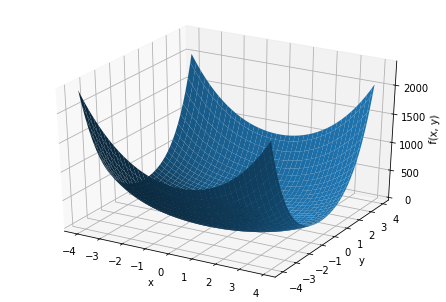

In [42]:
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x, y)")

ax.plot_surface(X,Y , Z)
plt.show()

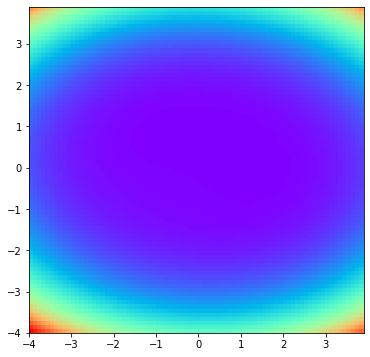

In [43]:
fig, axes = plt.subplots(1,1, figsize=(6,6))
axes.pcolor(X, Y, Z,cmap=plt.cm.rainbow)